### Outline
- <a href = #link1>  1. Problem Statement </a>
- <a href = #link2>  2. Data Overview </a>
- <a href = #link3>  3. Exploratory Data Analysis (EDA) </a>
- <a href = #link4>  4. Data Preprocessing </a>
- <a href = #link5>  5. Building a Linear Regression Model  </a>
- <a href = #link6>  6. Model Performance Evaluation   </a>
- <a href = #link7>  7. Checking Linear Regression Assumptions </a>
- <a href = #link8>  8. K-means vs Hierarchical Clustering </a>
- <a href = #link9>  9. Insights and Recommendations </a>

# <a name='link1'>  1. Problem Statement</a>

Buying and selling used smartphones used to be something that happened on a handful of online marketplace sites. But the used and refurbished phone market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth $52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used smartphones that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing a smartphone. There are plenty of other benefits associated with the used smartphone market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished smartphones. Maximizing the longevity of mobile phones through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost the cheaper refurbished smartphone segment, as consumers cut back on discretionary spending and buy phones only for immediate needs.

### Objective
The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished smartphones. The goal is to analyze the data provided by ReCell company (a startup aiming to tap the potential in this market) and build a linear regression model to predict the price of a used phone and identify factors that significantly influence it.

# <a name='link2'>  2. Data Overview</a>

### Importing Nessesory Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats

#Removes the limit from the number of displayed columns and rows.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

#Using plotly for specific plots of categorical variables
import plotly.graph_objects as go
import plotly.express as px
from  plotly.subplots import make_subplots
import plotly.io as pio

#Add a nice bachground to graphs and show graghs in the notebood
sns.set(color_codes=True)
%matplotlib inline 

#To build linear regression_model using sklearn
from sklearn.linear_model import LinearRegression
#Function to randomly split the data into train data and test data
from sklearn.model_selection import train_test_split  

#To build linear regression_model using statsmodels
import statsmodels.api as sm

#To check the regression model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

### Importing Data

In [2]:
#importing DataFrame with the name "used_phone_data.csv"
data=pd.read_csv('used_phone_data.csv')
data.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        23.97  yes   no            13.0   
1      Honor  Android        28.10  yes  yes            13.0   
2      Honor  Android        24.29  yes  yes            13.0   
3      Honor  Android        26.04  yes  yes            13.0   
4      Honor  Android        15.72  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  new_price  used_price  
0        127     111.62       86.96  
1        325     249.39      161.49  
2        162     359.47      268.55  
3        345     278.93      180.23  
4        293     140.87      103.80

In [3]:
print(f'There are {data.shape[1]} columns and {data.shape[0]} rows in the data set.')  # f-string

There are 15 columns and 3571 rows in the data set.


### Data Dictionary

The provided dataset contains the following columns:

1. `brand_name`: Name of manufacturing brand
2. `os`: OS on which the phone runs
3. `screen_size`: Size of the screen in cm
4. `4g`: Whether 4G is available or not
5. `5g`: Whether 5G is available or not
6. `main_camera_mp`: Resolution of the rear camera in megapixels
7. `selfie_camera_mp`: Resolution of the front camera in megapixels
8. `int_memory`: Amount of internal memory (ROM) in GB
9. `ram`: Amount of RAM in GB
10. `battery`: Energy capacity of the phone battery in mAh
11. `weight`: Weight of the phone in grams
12. `release_year`: Year when the phone model was released
13. `days_used`: Number of days the used/refurbished phone has been used
14. `new_price`: Price of a new phone of the same model in euros
15. `used_price`: Price of the used/refurbished phone in euros

Let us take a look at the imported data and the summary of different columns:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   os                3571 non-null   object 
 2   screen_size       3571 non-null   float64
 3   4g                3571 non-null   object 
 4   5g                3571 non-null   object 
 5   main_camera_mp    3391 non-null   float64
 6   selfie_camera_mp  3569 non-null   float64
 7   int_memory        3561 non-null   float64
 8   ram               3561 non-null   float64
 9   battery           3565 non-null   float64
 10  weight            3564 non-null   float64
 11  release_year      3571 non-null   int64  
 12  days_used         3571 non-null   int64  
 13  new_price         3571 non-null   float64
 14  used_price        3571 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 418.6+ KB


Four of the columns represent <font color='green'>categorical variables (qualitative)</font>, i.e.:

* brand_name
* os
* 4g
* 5g
And 11 other columns represent <font color='green'>quantitative variables</font>:

* screen_size
* main_camera_mp
* selfie_camera_mp
* int_memory
* ram
* battery
* weight
* release_year
* days_used
* new_price
* used_price

Now we check the missing values in the data. Below, number of missing values in any column of the imported data are shown:

In [5]:
data.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      180
selfie_camera_mp      2
int_memory           10
ram                  10
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

# <a name='link3'>  3. Exploratory Data Analysis (EDA)</a>

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help us approach the analysis in the right manner and generate insights from the data.

#### What does the distribution of used phone prices look like?

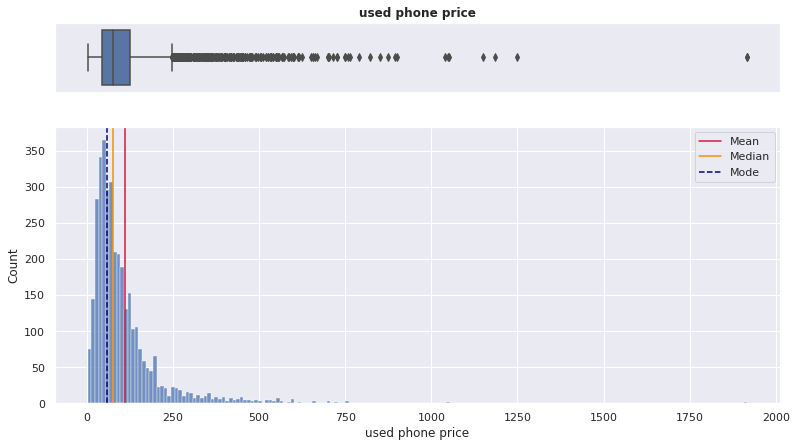

In [6]:
feature = "used_price"

fig, ax = plt.subplots(2, 1, figsize=(13,7),gridspec_kw={"height_ratios": [1,4]})

# we flatten the ax to iterate over subplots easily
ax = ax.flatten()

#Drawing boxplot
sns.boxplot(data=data, x=feature,orient="h",ax=ax[0]);
ax[0].set_title(label= 'used phone price', weight="bold"); # adding title to each figure
ax[0].xaxis.set_visible(False)

#Drawing histogram and specifying mean, median, and mode
sns.histplot(data=data, x=feature,ax=ax[1]);
ax[1].axvline(data[feature].mean(), color="crimson", label="Mean"); # adding mean vertical line
ax[1].axvline(data[feature].median(), color="darkorange", label="Median"); # adding median vertical line
ax[1].axvline(data[feature].mode()[0], ls="--" , color="navy", label="Mode"); # adding mode vertical line
ax[1].set(xlabel='used phone price', ylabel='Count');

ax[1].legend();

* The distribution of used phone prices is right skewed.
* Mean and median of prices are  110and 75.5, respectively.
* Prices range from  2.5to 1916.
* This is while most of cell phone prices are less than $126. Hence, there might be outliesr in the used price data.

Summery of all numerical features are show below:

In [7]:
data.describe()

screen_size  main_camera_mp  selfie_camera_mp   int_memory  \
count  3571.000000     3391.000000       3569.000000  3561.000000   
mean     14.803892        9.400454          6.547352    54.532607   
std       5.153092        4.818396          6.879359    84.696246   
min       2.700000        0.080000          0.300000     0.005000   
25%      12.700000        5.000000          2.000000    16.000000   
50%      13.490000        8.000000          5.000000    32.000000   
75%      16.510000       13.000000          8.000000    64.000000   
max      46.360000       48.000000         32.000000  1024.000000   

               ram       battery       weight  release_year    days_used  \
count  3561.000000   3565.000000  3564.000000   3571.000000  3571.000000   
mean      4.056962   3067.225666   179.424285   2015.964996   675.391487   
std       1.391844   1364.206665    90.280856      2.291784   248.640972   
min       0.030000     80.000000    23.000000   2013.000000    91.000000   
25%       4.000000   2100.000000   140.000000   2014.000000   536.000000   
50%       4.000000   3000.000000   159.000000   2016.000000   690.000000   
75%       4.000000   4000.000000   184.000000   2018.000000   872.000000   
max      16.000000  12000.000000   950.000000   2020.000000  1094.000000   

         new_price   used_price  
count  3571.000000  3571.000000  
mean    237.389037   109.880277  
std     197.545581   121.501226  
min       9.130000     2.510000  
25%     120.130000    45.205000  
50%     189.800000    75.530000  
75%     291.935000   126.000000  
max    2560.200000  1916.540000

#### What percentage of the used phone market is dominated by Android devices?

90.9 percent of used phone market is dominated by Android devices


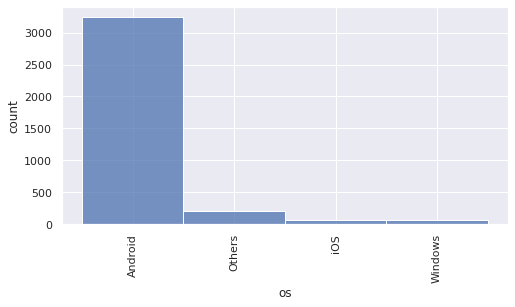

In [8]:
print('{} percent of used phone market is dominated by Android devices'.format(round(data['os'].value_counts(dropna=False)[0]/data['os'].value_counts(dropna=False).sum() *100 ,2))  )

fig = plt.figure(figsize=(8, 4));


ax=sns.histplot(x='os', data=data );

#adding labels
ax.set(xlabel='os', ylabel='count');
ax.tick_params(axis='x', rotation=90);

#### The amount of RAM is important for the smooth functioning of a phone. How does the amount of RAM vary with the brand?

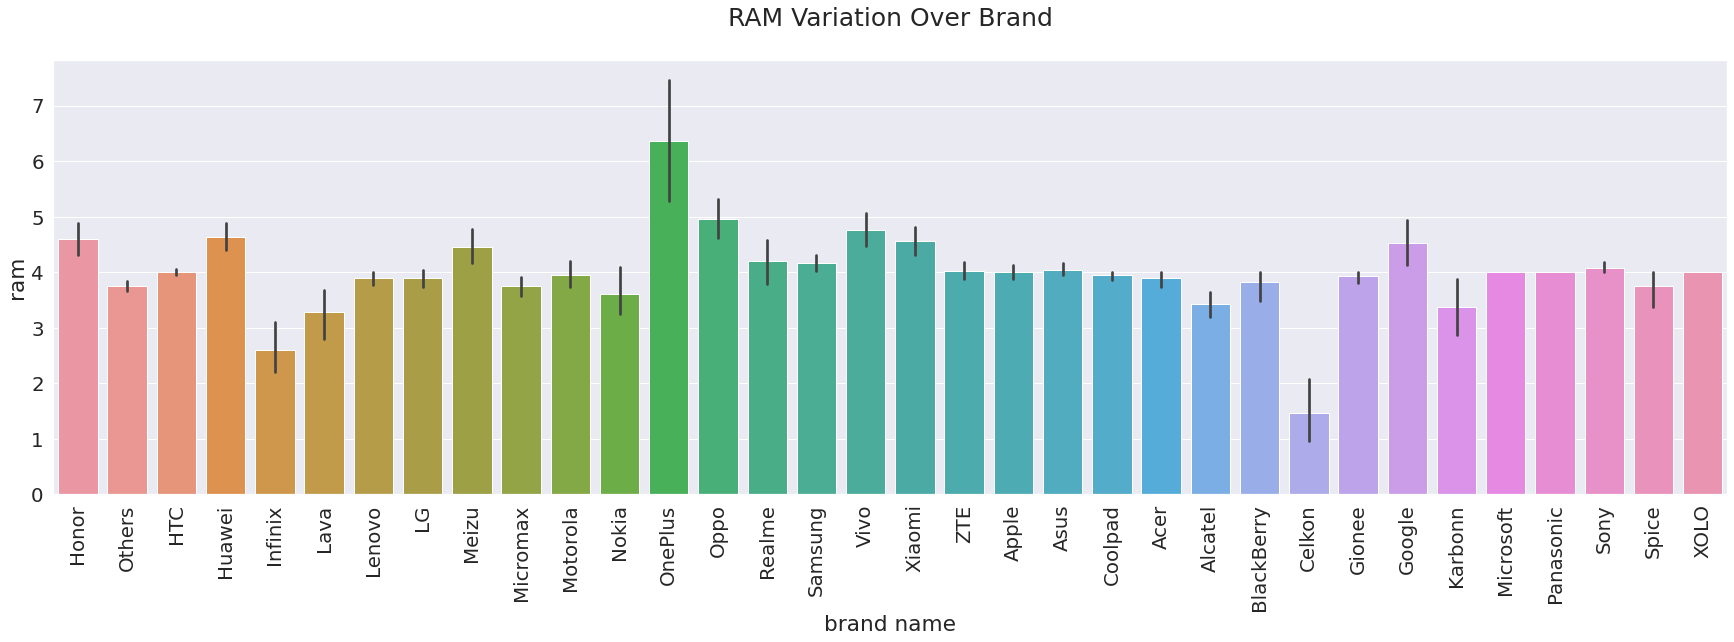

In [9]:
plt.figure(figsize=(30, 8));

#definig the color and font scale
color=sns. set_palette("husl")
sns.set(font_scale = 1.8)


#plotting
fig=sns.barplot(x='brand_name', y='ram', data=data, palette=color)  # barplot

#adding title and labels
plt.title('RAM Variation Over Brand\n', fontsize=25)
fig.set(xlabel='brand name', ylabel='ram');
plt.xticks(rotation=90);

* We see most variation in amount of ram of OnePlus phones.
* On the countrary, the variations are very small for some brands such as HTC, Lenovo,Samsung, Coolpad, etc.

#### A large battery often increases a phone's weight, making it feel uncomfortable in the hands. How does the weight vary for phones offering large batteries (more than 4500 mAh)?

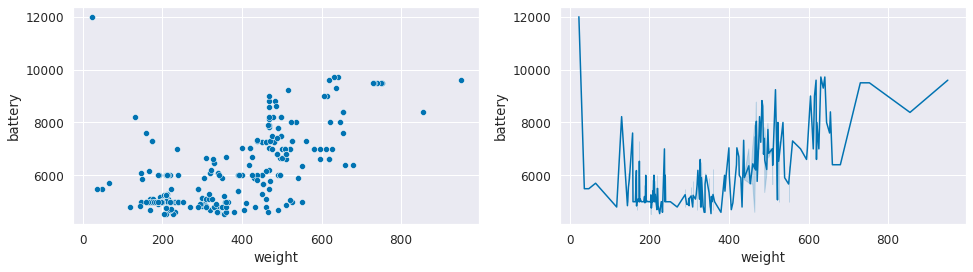

In [10]:
fig = plt.figure(figsize=(16, 4));
sns.set(font_scale = 1.1)

#definig the color
color=sns. set_palette("colorblind")

#plotting

# Adds subplot on position 1
fig.add_subplot(121)
sns.scatterplot(data= data[data['battery']> 4500] ,  x='weight',  y='battery');

# Adds subplot on position 2
fig.add_subplot(122)
sns.lineplot(data= data[data['battery']> 4500] ,  x='weight',  y='battery');

Phone's weight and battery size seem to have positive correlations. Overally, weight of the phone increases as the battery size increase. Histogram of phone weight for large battery sizes are as below:

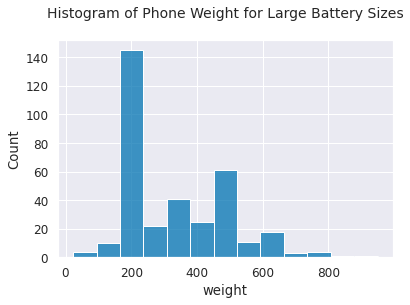

In [11]:
#plotting
plt.title('Histogram of Phone Weight for Large Battery Sizes\n', fontsize=14)

sns.histplot(data= data[data['battery']> 4500] , x='weight' );

#### Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones are available across different brands with a screen size larger than 6 inches?

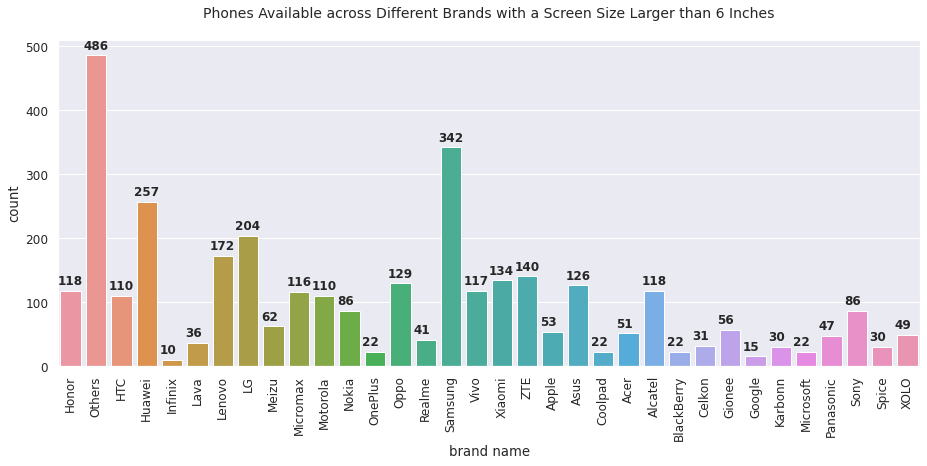

In [12]:
fig = plt.figure(figsize=(34, 6));

# Adds subplot on position 1
fig.add_subplot(121)

# plot the barchart
plt.title('Phones Available across Different Brands with a Screen Size Larger than 6 Inches\n', fontsize=14)

ax=sns.countplot(x='brand_name', data=data[data['screen_size']> 6] )

# display counts on each bar
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x() -0.1, p.get_height()+10) , fontsize=12, weight='bold')

#adding labels
ax.set(xlabel='brand name', ylabel='count');
ax.tick_params(axis='x', rotation=90);

Let us sort the above plot based on the counts.

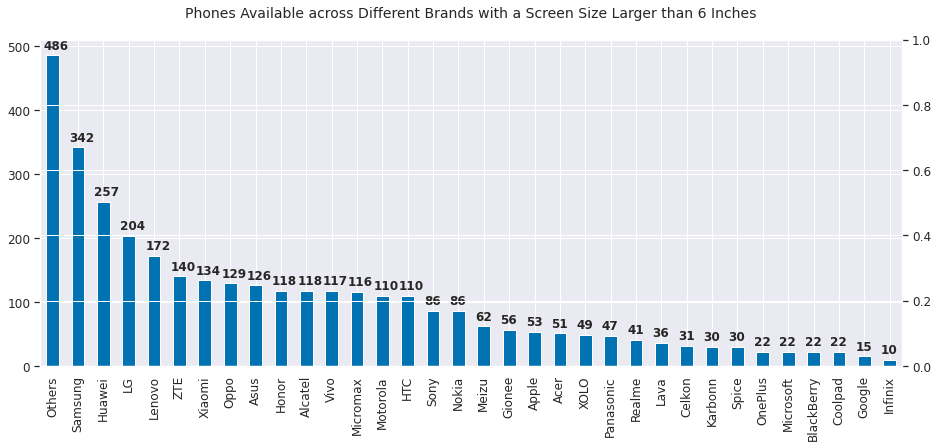

In [13]:
fig = plt.figure(figsize=(34, 6));

# Adds subplot on position 1
fig.add_subplot(121)

# plot the barchart
plt.title('Phones Available across Different Brands with a Screen Size Larger than 6 Inches\n', fontsize=14)

ax = data[data['screen_size']> 6]['brand_name'].value_counts().plot(kind="bar", rot=90)
# Make twin axis
ax2 = ax.twinx()

# display counts on each bar
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x() -0.1, p.get_height()+10) , fontsize=12, weight='bold')

Samsung, Huawei, LG, and Lenovo respectively are the most frequent brands with big screens.

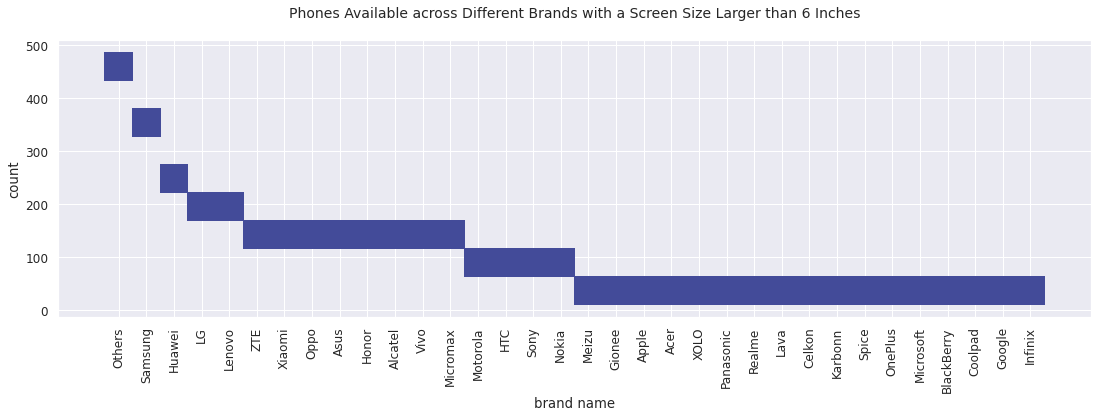

In [14]:
counts=data[data['screen_size']> 6]['brand_name'].value_counts().tolist()
bins=data[data['screen_size']> 6]['brand_name'].value_counts().index.tolist()

fig = plt.figure(figsize=(30, 6));

# Adds subplot on position 1
ax=fig.add_subplot(121)

#definig the color
color=sns. set_palette("dark")

#plotting
plt.title('Phones Available across Different Brands with a Screen Size Larger than 6 Inches\n', fontsize=14)
sns.histplot(y=counts, x=bins, palette=color);  # sorted plot

#adding labels
ax.set(xlabel='brand name', ylabel='count');
ax.tick_params(axis='x', rotation=90);

fig.tight_layout()

#### Budget phones nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget phones offering greater than 8MP selfie cameras across brands?

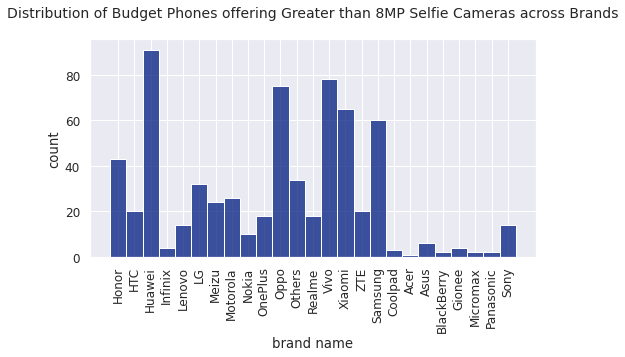

In [15]:
fig = plt.figure(figsize=(8, 4));

plt.title('Distribution of Budget Phones offering Greater than 8MP Selfie Cameras across Brands\n', fontsize=14)
ax=sns.histplot(x='brand_name', data=data[data['selfie_camera_mp']> 8] );

#adding labels
ax.set(xlabel='brand name', ylabel='count');
ax.tick_params(axis='x', rotation=90);

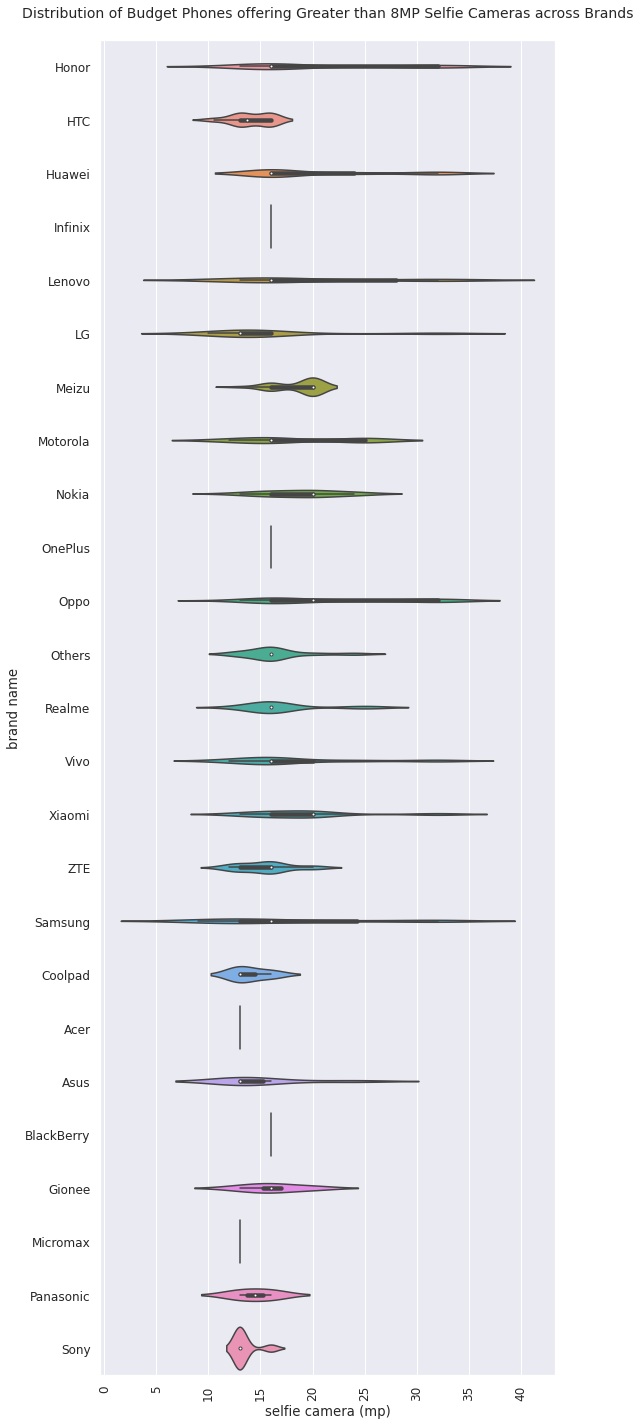

In [16]:
fig = plt.figure(figsize=(8, 20));

plt.title('Distribution of Budget Phones offering Greater than 8MP Selfie Cameras across Brands\n', fontsize=14)

ax=sns.violinplot(data=data[data['selfie_camera_mp']> 8], x="selfie_camera_mp", y="brand_name"  );

#adding labels
ax.tick_params(axis='x', rotation=90);
ax.set(xlabel='selfie camera (mp)' , ylabel='brand name');

fig.tight_layout()

* Samsung, LG, Lenovo, and honor respectively are the brands with most dispersed selfie camera resolution.
* On the contrary Infinix, OnePlus, Acer, BlackBerry, Micromax have the least dispersed selfie camera resolution.

#### Which attributes are highly correlated with the used phone price?

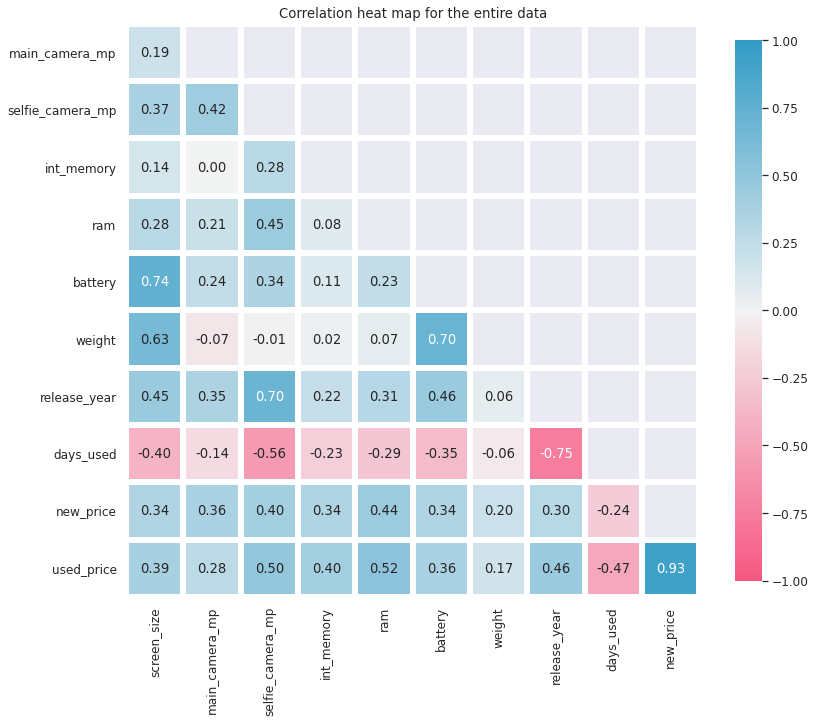

In [19]:
df_corr=data.corr()

fig = plt.figure(figsize=(12, 11));

#mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
b
#adjust the mask
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()

# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

# plot heatmap
ax=sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
               cbar_kws={"shrink": 0.8}, square=True);


plt.title('Correlation heat map for the entire data');

fig.tight_layout()

* `new price` is highly and positively correlated with target variable `used_price` which is good for model prediction.
* Moreover, correlations of `ram`, `selffie_camera_mp`, `days_used`, and `release_year` features with the target variable is noticable.
* `days_used` is highly and negatively correlated with `release_year` which is not good since on of the linear regression assumptions is the independence of predictor features.

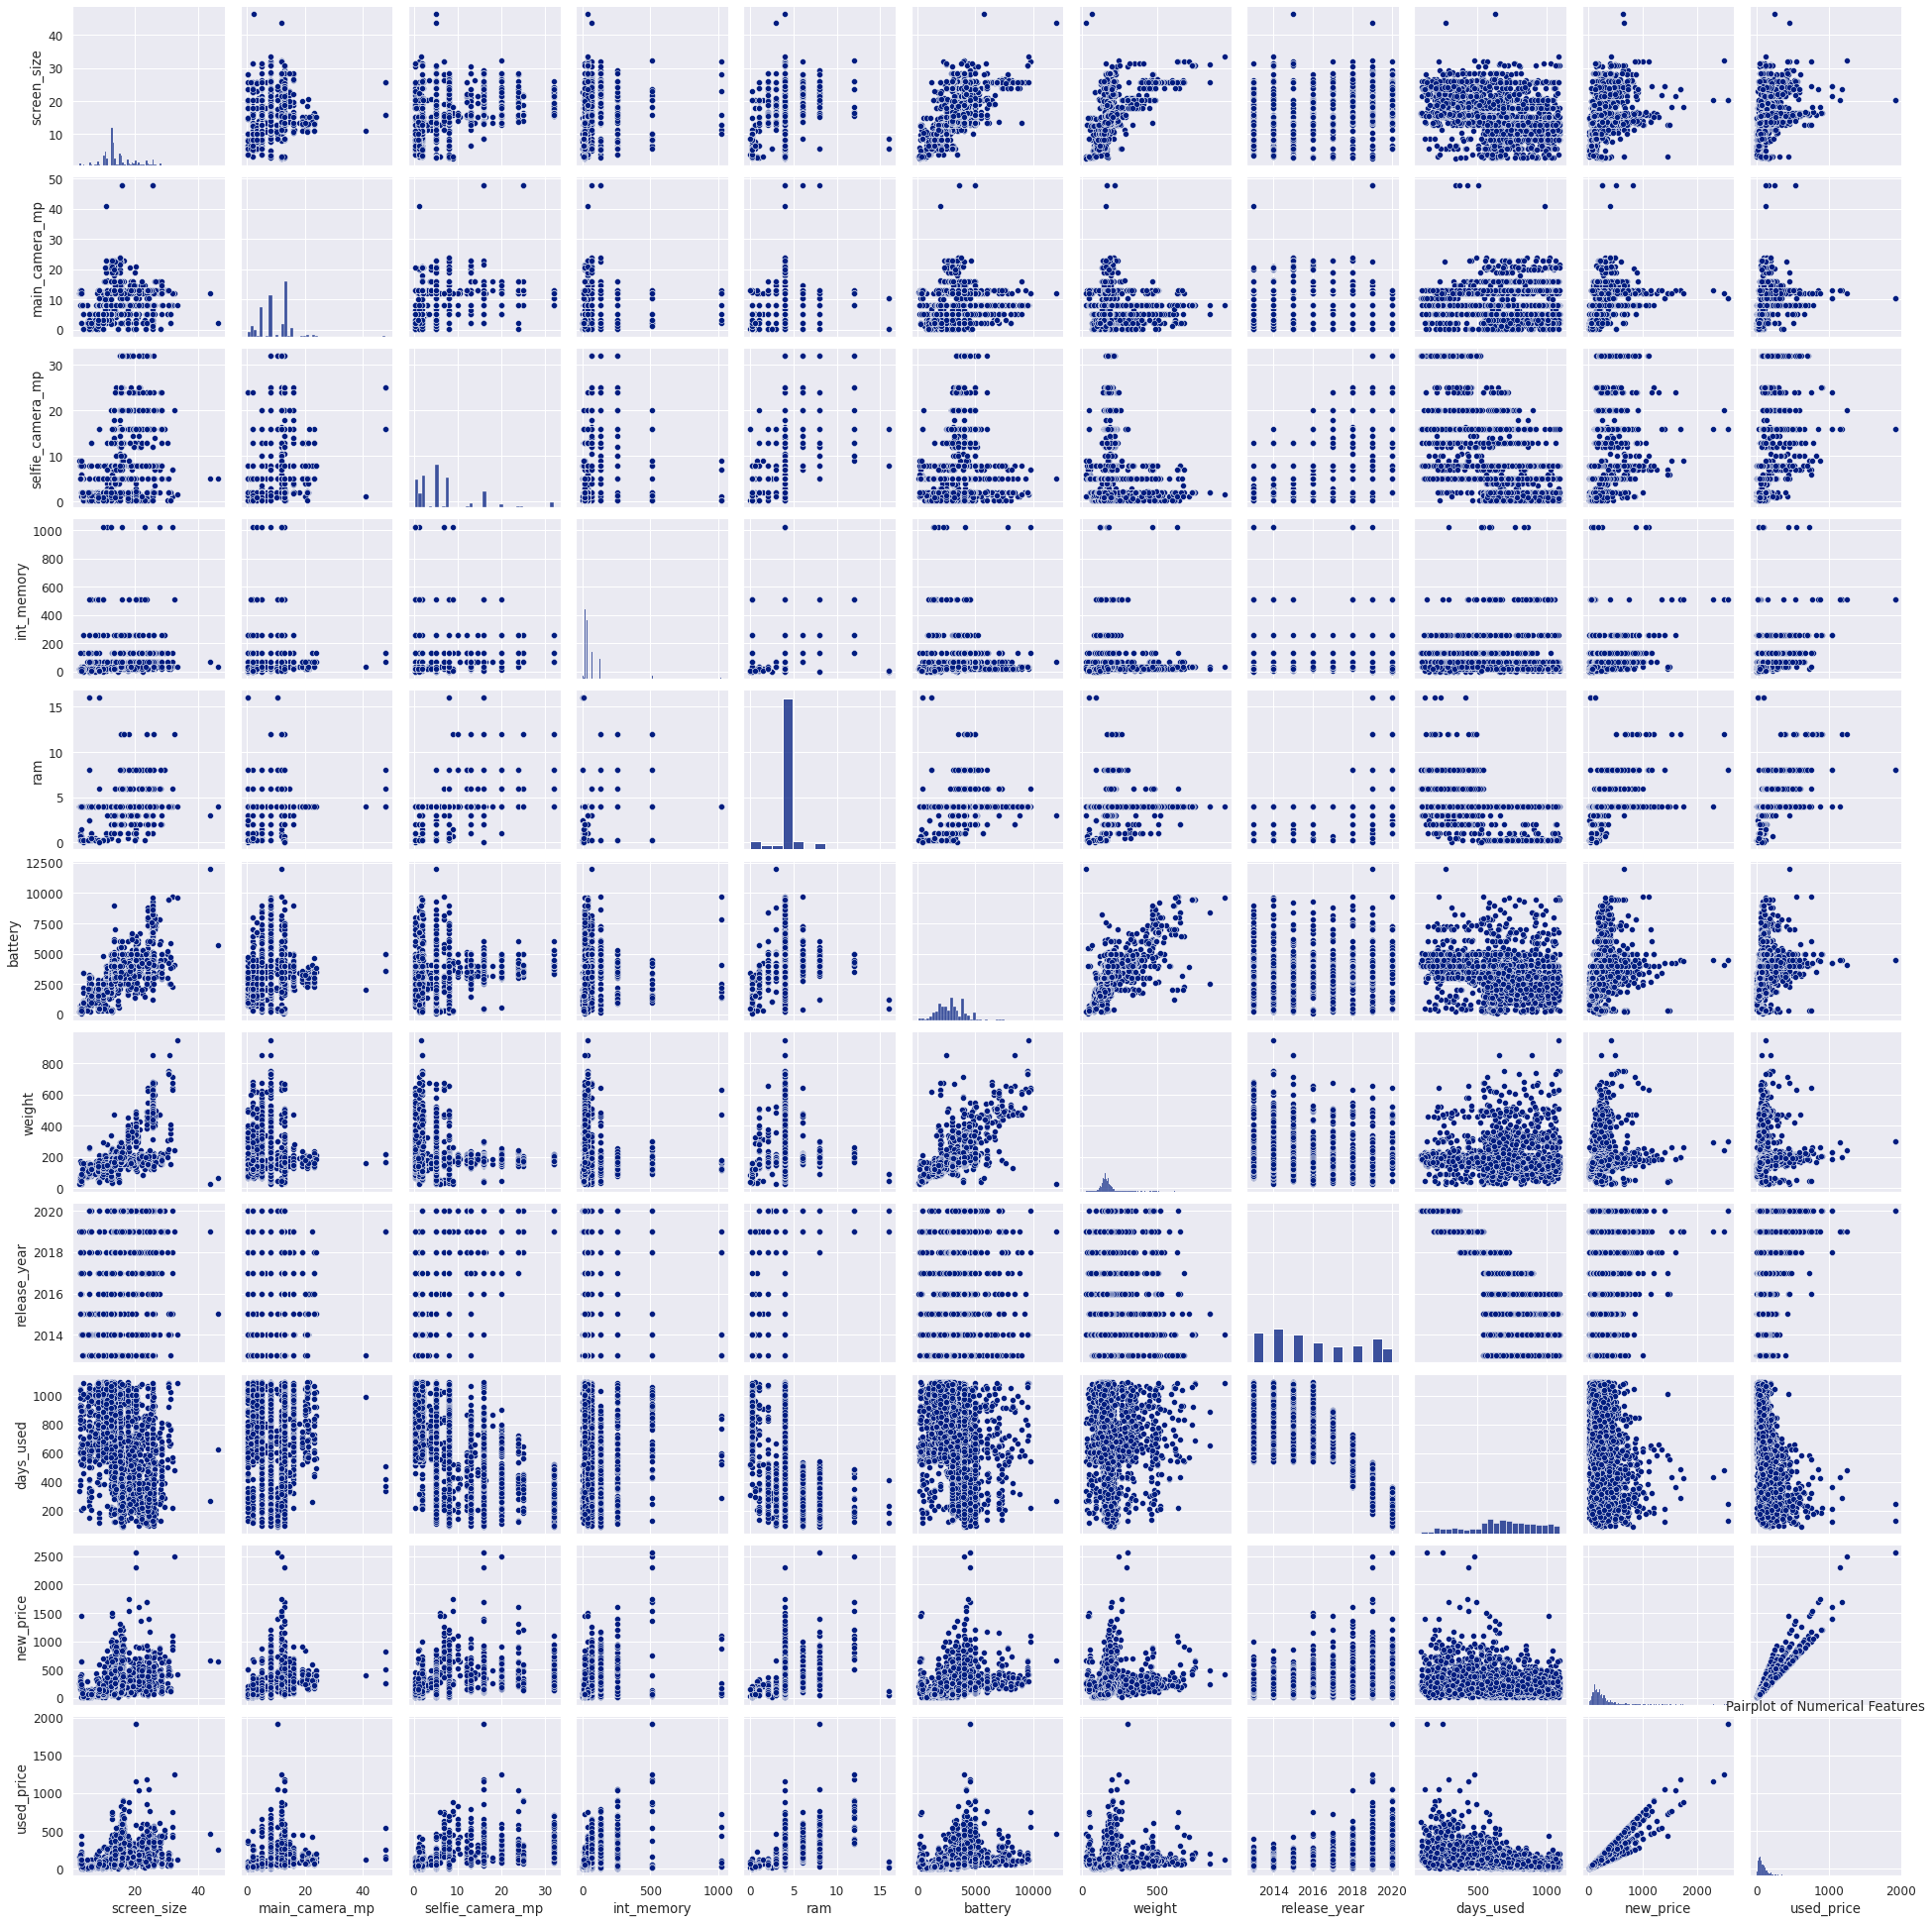

In [21]:
sns.pairplot(data);
plt.title('Pairplot of Numerical Features');

* As shown above, we can see that most of the histograms of numerical features are skewed. Moreover, it seems that we may be facing with outliers in them.
* We can see a linear relation between the new phone price and the target value (the used phone prices). This is positive in building the regression model.
* Among the predictor features, we can see positive correlation between weight and battery feature which is not good for the model.
* Weight feature also have a positive relation with the battery feature which again is not good for the model.

# <a name='link4'>  4. Data Preprocessing</a>

* Missing Value Treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

### 4.1 Missing Value Treatment
List of variables that have missing values and the amount that is missing is listed below:

In [22]:
data.isnull().sum()[data.isnull().sum()>0]

main_camera_mp      180
selfie_camera_mp      2
int_memory           10
ram                  10
battery               6
weight                7
dtype: int64

There is no missing values in the target variable (used_price). However, six predictor variables have missing values and need treatments. All of these variables are quantitave variables with type 'float64'.

**Let us fix the missing values**.

For the six predictor variables, we will replace the missing values in each column with the column's median.

In [23]:
#Function to fill missing value with the median of associated values
medianFiller = lambda x: x.fillna(x.median())

#Creating a list of duantitative variables that have missing values
numeric_columns = data.isnull().sum()[data.isnull().sum()>0].index.tolist()

#Apply the medianFiller function on the numeric_columns in data set
data[numeric_columns] = data[numeric_columns].apply(medianFiller, axis=0)

In [24]:
# checking the number of missing values
data.isnull().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
dtype: int64

We can see that all the missing values have been treated.

### 4.2 Duplicate value check
Now, we want to figure out whether we have duplicate data and how to deal with them.

In [25]:
# Count the number of non-duplicates
(~data.duplicated()).sum()

3571

In [26]:
# Count the number of duplicates in rows
data.duplicated().sum()

0

As we can see, there are no duplicated rows in our DataFrame.

### 4.5 Feature Engineering

In [27]:
# looking at value counts for non-numeric features

num_to_display = 10  # defining number of displayed levels for each non-numeric feature
for colname in data.dtypes[data.dtypes == 'object'].index:
    
    val_counts = data[colname].value_counts(dropna=False)  # Show NA counts
    print(f'\n\ncategrical variable= {colname} ') #f-String
    
    if len(val_counts) > num_to_display:
        print(f'Only displaying first {num_to_display} of {len(val_counts)} values.\n') #f-String

    print(val_counts.iloc[:num_to_display])



categrical variable= brand_name 
Only displaying first 10 of 34 values.

Others     509
Samsung    364
Huawei     264
LG         212
Lenovo     172
ZTE        141
Xiaomi     134
Oppo       129
Asus       126
Alcatel    125
Name: brand_name, dtype: int64


categrical variable= os 
Android    3246
Others      202
Windows      67
iOS          56
Name: os, dtype: int64


categrical variable= 4g 
yes    2359
no     1212
Name: 4g, dtype: int64


categrical variable= 5g 
no     3419
yes     152
Name: 5g, dtype: int64


Checking the levels of each categorical variable (feature), we can see that there are no values that don't look valid and we can proceed with our analysis.

In [28]:
# looking at value counts for numeric features (quantitative variable)

num_to_display = 10  # defining number of displayed levels for each numeric feature
for colname in data.dtypes[data.dtypes != 'object'].index:
    
    val_counts = data[colname].value_counts(dropna=False)  # Show NA counts
    print(f'\n\nnumerical variable= {colname} ') #f-String
    
    if len(val_counts) > num_to_display:
        print(f'Only displaying first {num_to_display} and last {num_to_display} of {len(val_counts)} values.\n') #f-String
        
    print(val_counts.iloc[: num_to_display])
    print(val_counts.iloc[- num_to_display:-1])



numerical variable= screen_size 
Only displaying first 10 and last 10 of 127 values.

12.70    576
13.49    409
10.95    219
10.16    189
15.24    129
13.02    117
17.78    114
13.81    112
11.27    110
20.32     90
Name: screen_size, dtype: int64
10.80    1
5.56     1
22.38    1
2.70     1
27.78    1
46.36    1
43.66    1
9.84     1
30.96    1
Name: screen_size, dtype: int64


numerical variable= main_camera_mp 
Only displaying first 10 and last 10 of 44 values.

13.00    1052
8.00      960
5.00      561
12.00     212
2.00      176
16.00     155
3.15      123
0.30       85
10.50      34
1.30       27
Name: main_camera_mp, dtype: int64
12.65    1
22.60    1
41.00    1
21.50    1
22.50    1
1.90     1
20.20    1
2.10     1
12.60    1
Name: main_camera_mp, dtype: int64


numerical variable= selfie_camera_mp 
Only displaying first 10 and last 10 of 37 values.

5.0     827
8.0     577
2.0     557
0.3     508
16.0    305
1.3     153
32.0     94
13.0     90
20.0     68
1.2      47
Name: se

All values seem to be valid.

### Data Binning

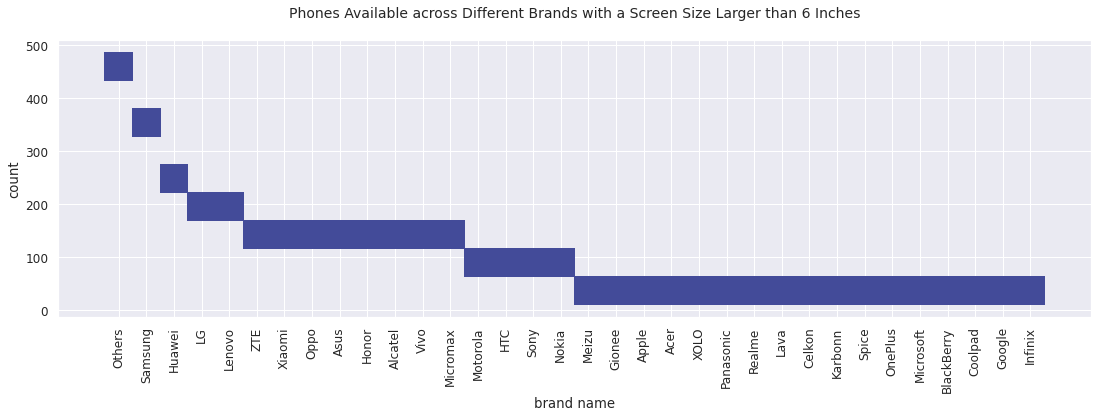

In [30]:
counts=data[data['screen_size']> 6]['brand_name'].value_counts().tolist()
bins=data[data['screen_size']> 6]['brand_name'].value_counts().index.tolist()

fig = plt.figure(figsize=(30, 6));

# Adds subplot on position 1
ax=fig.add_subplot(121)

#definig the color
color=sns. set_palette("dark")

#plotting
plt.title('Phones Available across Different Brands with a Screen Size Larger than 6 Inches\n', fontsize=14)
sns.histplot(y=counts, x=bins, palette=color);  # sorted plot

#adding labels
ax.set(xlabel='brand name', ylabel='count');
ax.tick_params(axis='x', rotation=90);

fig.tight_layout()

In [31]:
# Function for binnig categorival variable 'brand_name' into 7 groups
def Binning_brands (row):
    if row['brand_name'] in ['Others']:
        return 'Brand_g1'
    if row['brand_name'] in ['Samsung']:
        return 'Brand_g2'
    if row['brand_name'] in ['Huawei']:
        return 'Brand_g3'
    if row['brand_name'] in ['LG','Lenovo']:
        return 'Brand_g4'
    if row['brand_name'] in ['ZTE','Xiaomi','Oppo', 'Asus','Honor','Alcatel','Vivo','Micromax']:
        return 'Brand_g5'
    if row['brand_name'] in ['HTC','Motorola','Nokia','Sonny']:
        return 'Brand_g6'
    if row['brand_name'] in ['Meizu','Gionee','Apple','Acer','XOLO','Panasonic','Realme','Lava','Celkon','Karbonn','Spice','OnePlus','Microsoft','BlackBerry','Coolpad','Google','Infinix']:
        return 'Brand_g7'
    return 'Brand_g1'

#applying Binning_brands function on each row of data set
data['brand_label'] = data.apply(lambda row: Binning_brands(row), axis=1)

In [32]:
data=data.drop(['brand_name'], axis=1)

data['brand_label'].value_counts(dropna=False)

Brand_g5    1010
Brand_g7     611
Brand_g1     597
Brand_g4     384
Brand_g2     364
Brand_g6     341
Brand_g3     264
Name: brand_label, dtype: int64

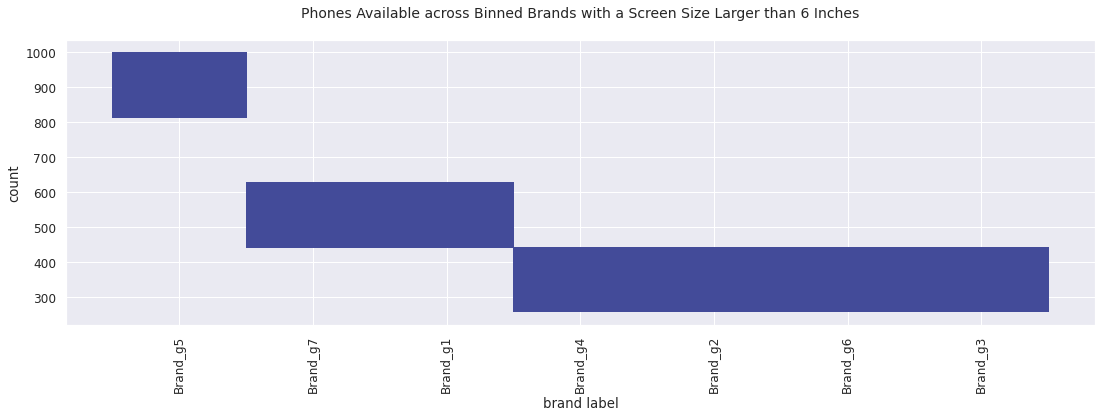

In [34]:
counts=data[data['screen_size']> 6]['brand_label'].value_counts().tolist()
bins=data[data['screen_size']> 6]['brand_label'].value_counts().index.tolist()

fig = plt.figure(figsize=(30, 6));

# Adds subplot on position 1
ax=fig.add_subplot(121)

#definig the color
color=sns. set_palette("dark")

#plotting
plt.title('Phones Available across Binned Brands with a Screen Size Larger than 6 Inches\n', fontsize=14)

sns.histplot(y=counts, x=bins, palette=color);  # sorted plot

#adding labels
ax.set(xlabel='brand label', ylabel='count');
ax.tick_params(axis='x', rotation=90);

fig.tight_layout()

### 4.3 Outlier detection and treatment
An outlier is a data point that is distant from other similar points. Linear regression is easily impacted by the outliers in the data. Outliers can distort predictions and affect the accuracy so it's important to flag them for review. This is especially the case with regression models.

#### Outlier detection using IQR
We use **IQR**, which is the interval going from the 1st quartile to the 3rd quartile of the data in question, and then flag points for investigation if they are outside 1.5 * IQR. The following function is used to calculate fracttion of outliers for each numerical columns based on IQR.

In [35]:
#Creating a function to calculate fraction of outliers
def frac_outside_IQR(y):
    x=y.to_numpy(dtype=object)
    length = 1.5 * np.diff(np.quantile(x, [.25, .75]))
    frac=round(np.mean(np.abs(x - np.median(x)) > length),2)
    return frac

#Create list of quantitative variables
numeric_columns=data.dtypes[data.dtypes != 'object'].index.tolist()

#Apply the frac_outside_IQR function on the numeric_columns in data set
data[numeric_columns].apply(frac_outside_IQR, axis=0)

screen_size         0.24
main_camera_mp      0.02
selfie_camera_mp    0.15
int_memory          0.15
ram                 0.18
battery             0.04
weight              0.15
release_year        0.00
days_used           0.02
new_price           0.09
used_price          0.11
dtype: float64

Let us plot the boxplots of all numerical columns to display outliers.

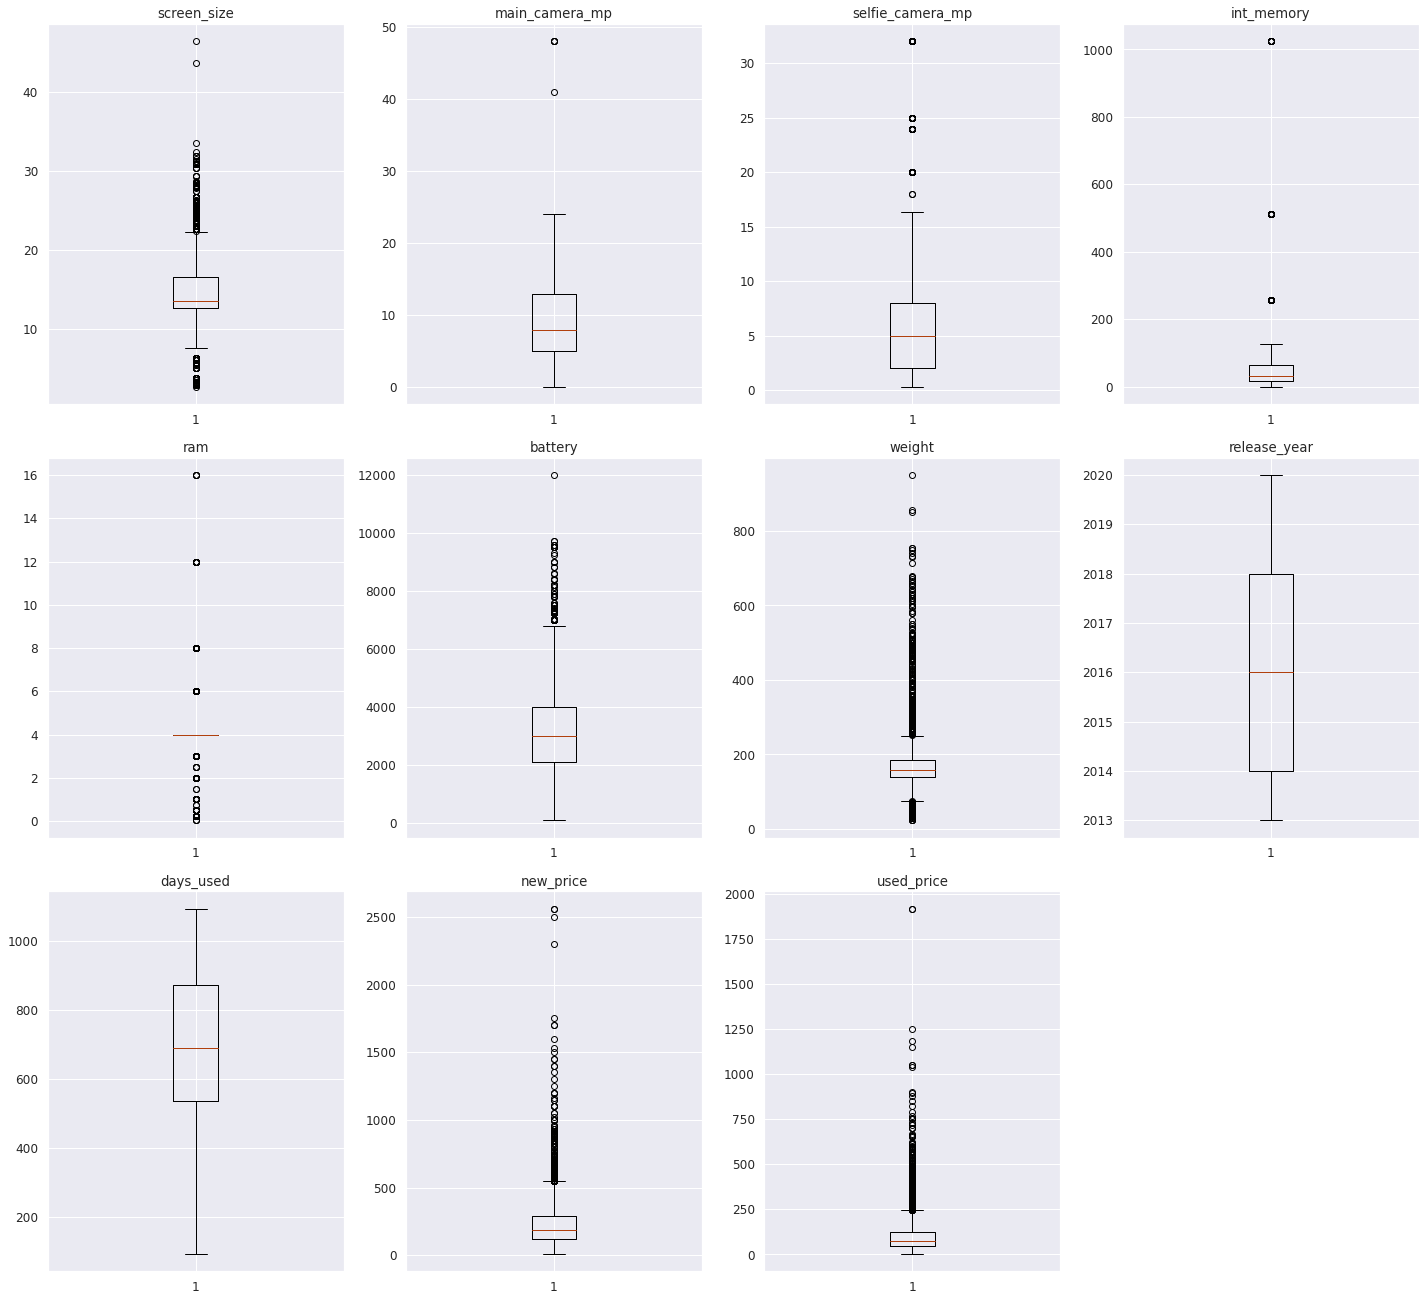

In [36]:
plt.figure(figsize=(20, 30))

# numerical columns
columns=data.dtypes[data.dtypes != 'object'].index 

# plot
for i, variable in enumerate(columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

#### Outlier Treatment
We treat outliers in the data by flooring and capping as follows:

In [37]:
def treat_outliers(x):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = x.quantile(0.25)  # 25th quantile
    Q3 = x.quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    x = np.clip(x, Lower_Whisker, Upper_Whisker)

    return x


#Create list of quantitative variables
numeric_columns=data.dtypes[data.dtypes != 'object'].index.tolist()

#Apply the frac_outside_IQR function on the numeric_columns in data set
data[numeric_columns]=data[numeric_columns].apply(treat_outliers, axis=0)

Let us look at the boxplots to see if the outliers have been treated or not.

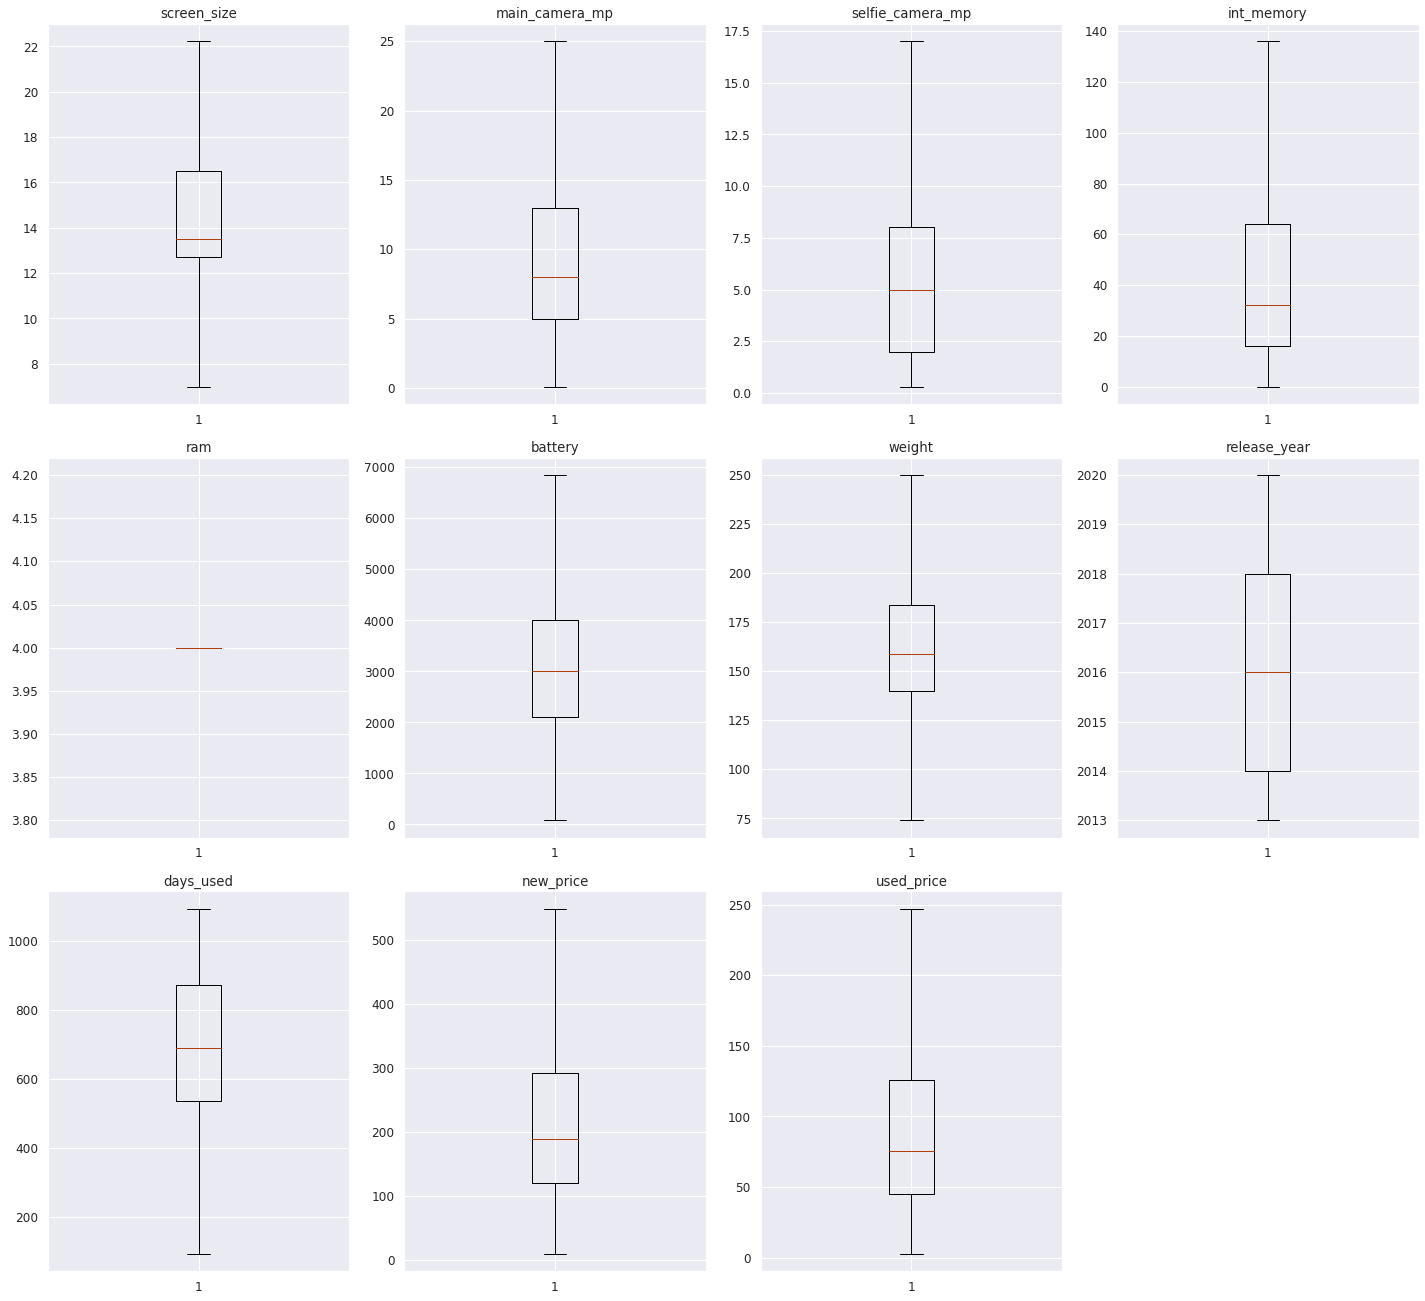

In [38]:
plt.figure(figsize=(20, 30))

# numerical columns
columns=data.dtypes[data.dtypes != 'object'].index 

# plot
for i, variable in enumerate(columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

### 4.4 EDA after Data Manipulation
It is a good idea to explore the data once again after manipulating it.

In [39]:
data.head()

os  screen_size   4g   5g  main_camera_mp  selfie_camera_mp  \
0  Android       22.225  yes   no            13.0               5.0   
1  Android       22.225  yes  yes            13.0              16.0   
2  Android       22.225  yes  yes            13.0               8.0   
3  Android       22.225  yes  yes            13.0               8.0   
4  Android       15.720  yes   no            13.0               8.0   

   int_memory  ram  battery  weight  release_year  days_used  new_price  \
0        64.0  4.0   3020.0   146.0          2020        127     111.62   
1       128.0  4.0   4300.0   213.0          2020        325     249.39   
2       128.0  4.0   4200.0   213.0          2020        162     359.47   
3        64.0  4.0   6850.0   250.0          2020        345     278.93   
4        64.0  4.0   5000.0   185.0          2020        293     140.87   

   used_price brand_label  
0     86.9600    Brand_g5  
1    161.4900    Brand_g5  
2    247.1925    Brand_g5  
3    180.2300    Brand_g5  
4    103.8000    Brand_g5

In [40]:
data.describe()

screen_size  main_camera_mp  selfie_camera_mp   int_memory     ram  \
count  3571.000000     3571.000000       3571.000000  3571.000000  3571.0   
mean     14.521803        9.299619          5.972417    44.583202     4.0   
std       4.165771        4.530650          5.287271    38.938853     0.0   
min       6.985000        0.080000          0.300000     0.005000     4.0   
25%      12.700000        5.000000          2.000000    16.000000     4.0   
50%      13.490000        8.000000          5.000000    32.000000     4.0   
75%      16.510000       13.000000          8.000000    64.000000     4.0   
max      22.225000       25.000000         17.000000   136.000000     4.0   

           battery       weight  release_year    days_used    new_price  \
count  3571.000000  3571.000000   3571.000000  3571.000000  3571.000000   
mean   3042.193083   164.415584   2015.964996   675.391487   221.841506   
std    1272.573404    41.098253      2.291784   248.640972   135.411699   
min      80.000000    74.000000   2013.000000    91.000000     9.130000   
25%    2100.000000   140.000000   2014.000000   536.000000   120.130000   
50%    3000.000000   159.000000   2016.000000   690.000000   189.800000   
75%    4000.000000   184.000000   2018.000000   872.000000   291.935000   
max    6850.000000   250.000000   2020.000000  1094.000000   549.642500   

        used_price  
count  3571.000000  
mean     95.528957  
std      66.145611  
min       2.510000  
25%      45.205000  
50%      75.530000  
75%     126.000000  
max     247.192500

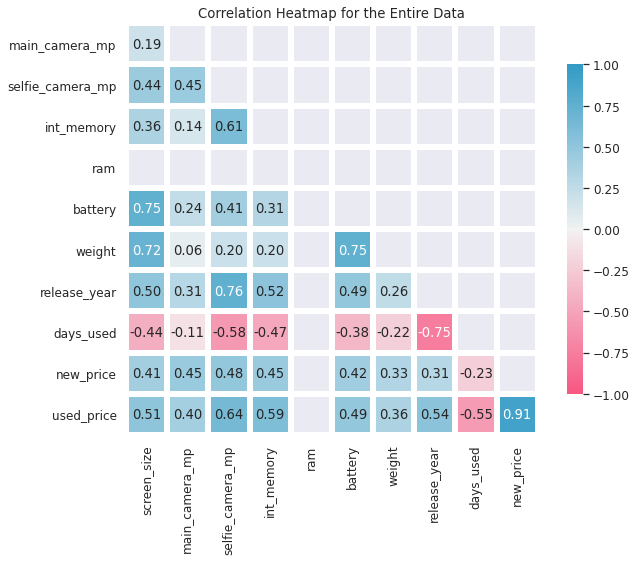

In [42]:
df_corr=data.corr()

fig = plt.figure(figsize=(10, 8));

#mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

#adjust the mask
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()

# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

# plot heatmap
ax=sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
               cbar_kws={"shrink": 0.8}, square=True);


plt.title('Correlation Heatmap for the Entire Data');

fig.tight_layout()

* Consistent with previous analysis, there is a high positive correlation between the new price and the old price of the phones.
* It seems that after data manipulations, amount of correlations between quantitative features has increased.
* `release_year` feature have also a high positive correlation with `selfie_camera_mp` feature.
* `weight` have a high positive correlation with `battery` and `screen_size`.
* `battery` have also a high positive correlation with `screen_size`.
* Among the negative correlations, `days_used` and `release_year` have the greatest corralations.
* It is also noticable that `ram` feature does not have any correlations with other features as it has a constant value and is not influenced by variations in other features.

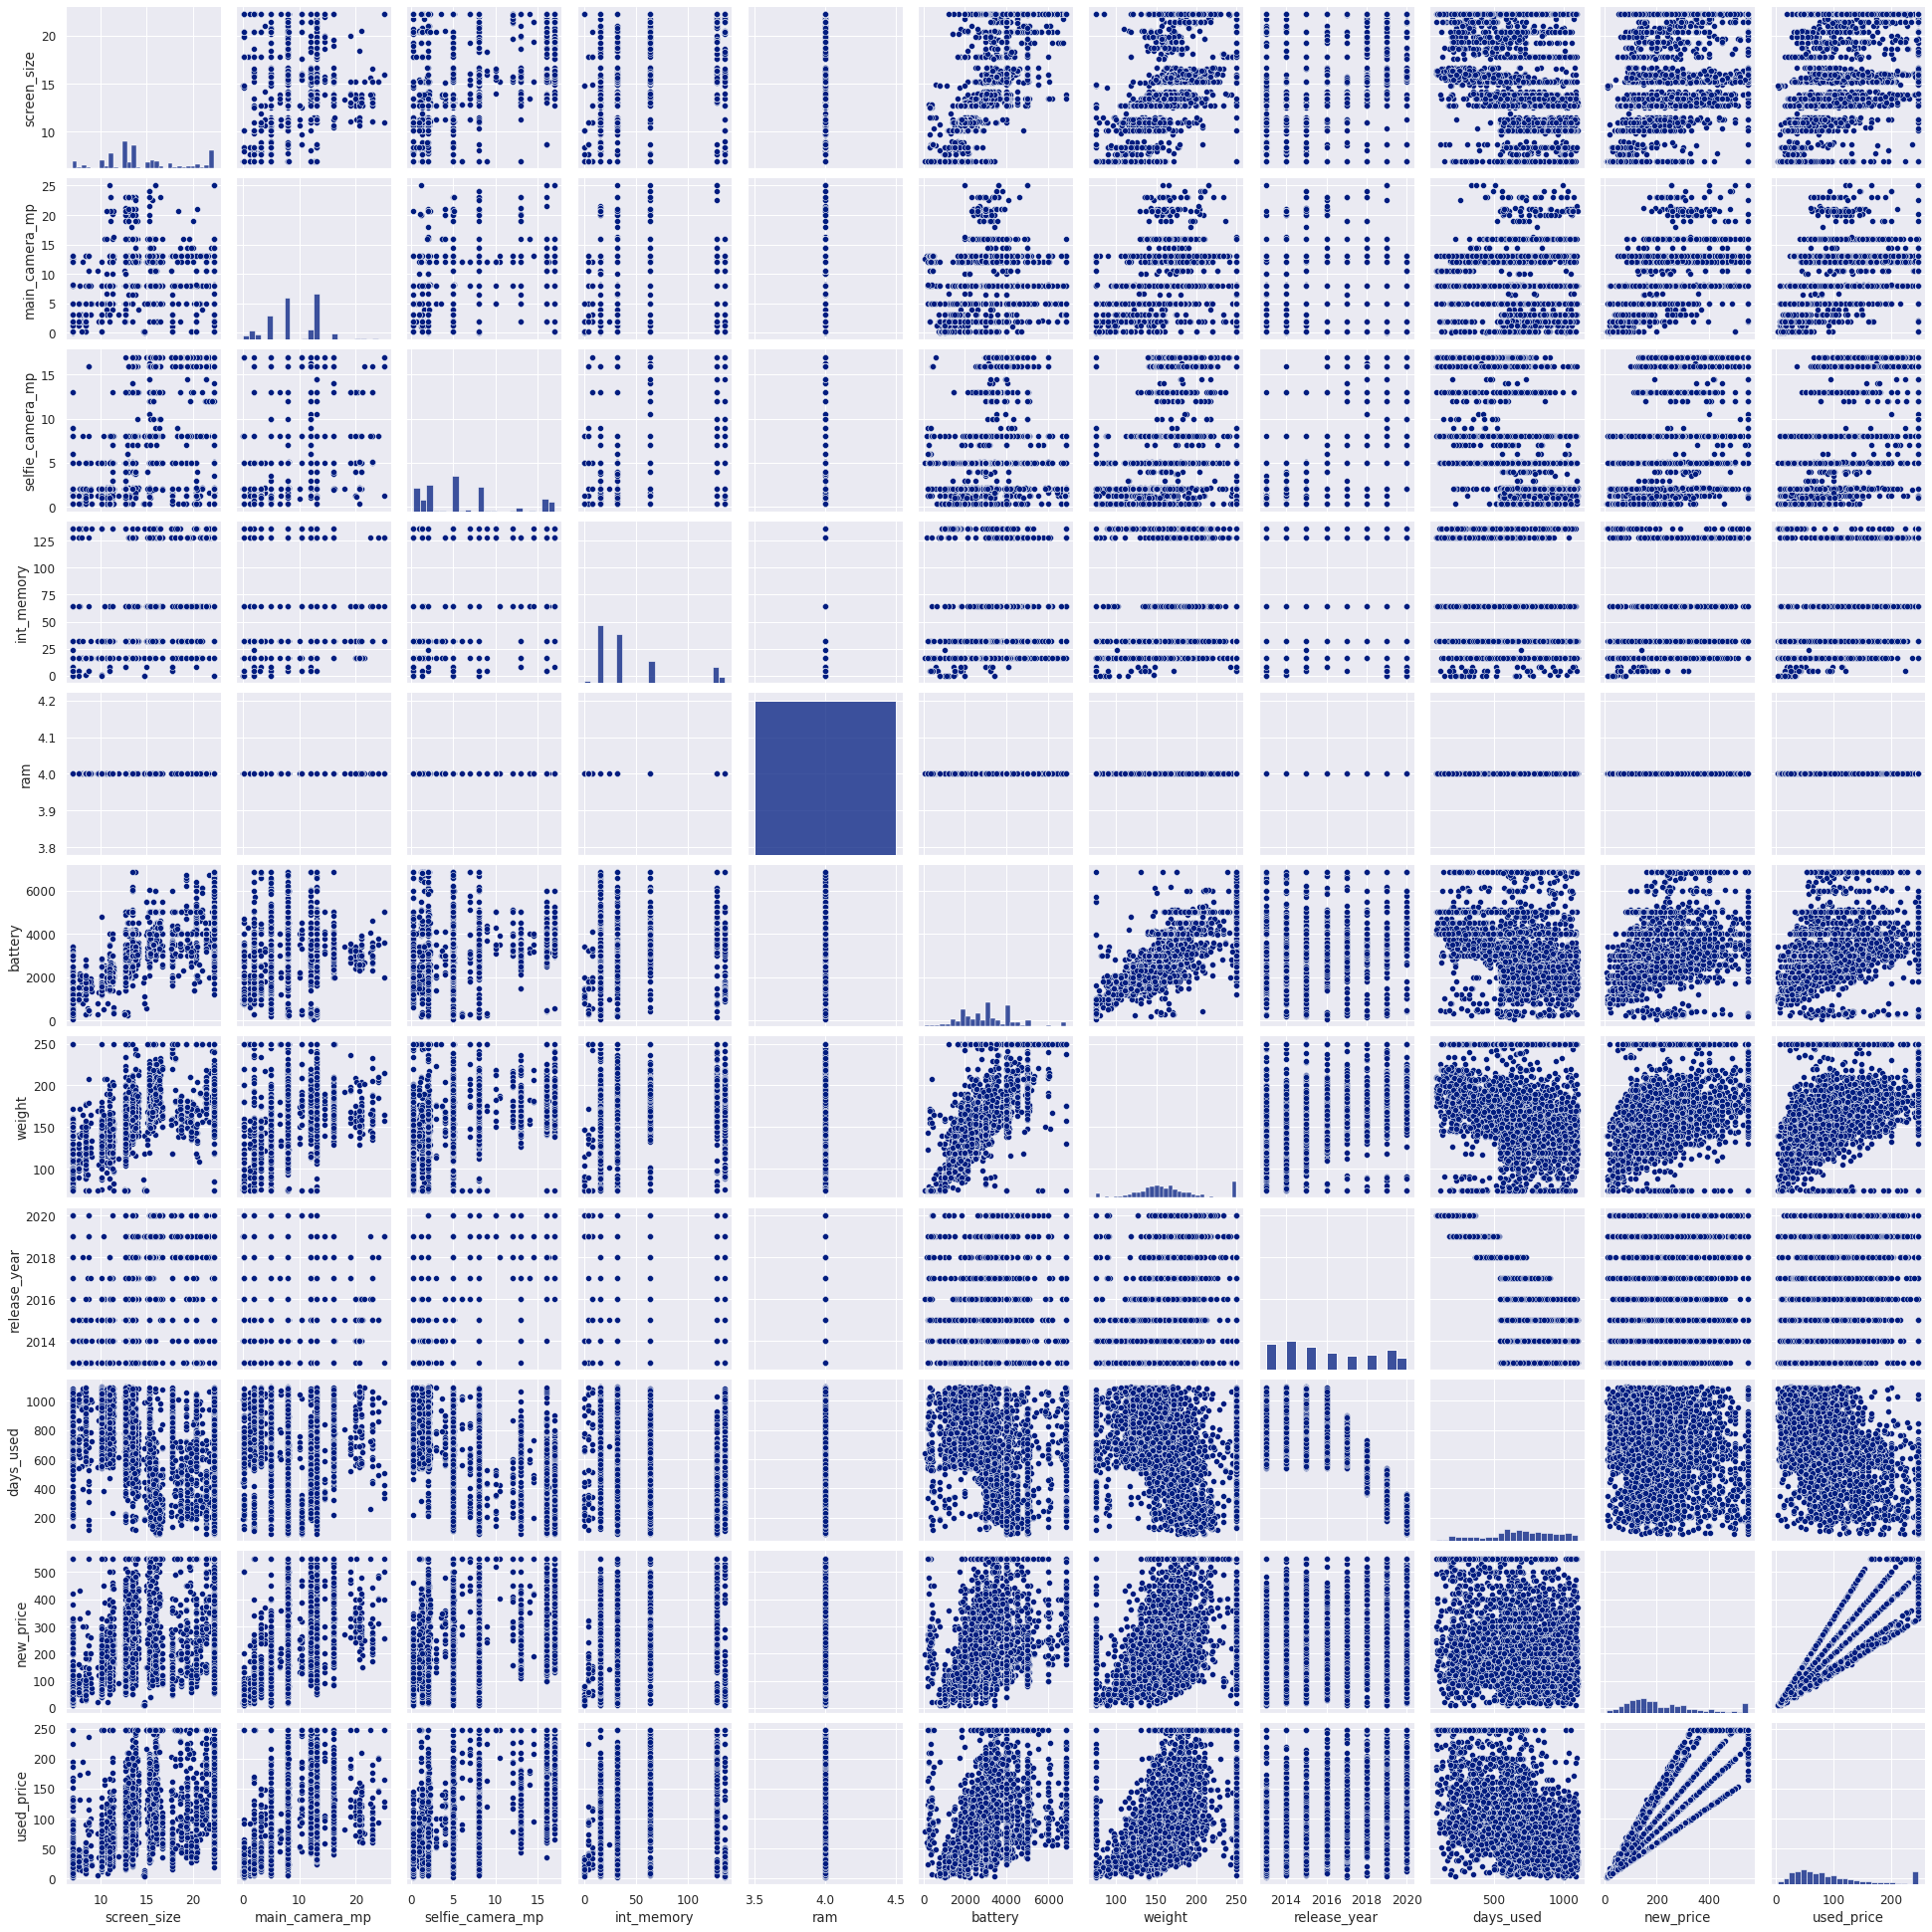

In [43]:
sns.pairplot(data);

# <a name='link5'>  5. Building a Linear Regression Model</a>

### 5.1 one-hot encodig categorical variable
We want to predict the used price.

Before we proceed to build a model, we'll have to encode categorical features.

In [44]:
#Create list of chategorical variables
object_columns=data.dtypes[data.dtypes == 'object'].index.tolist()

#Creating dummy variables and one-hot encoding for categorical variables
data=pd.get_dummies(data, columns = object_columns, drop_first=True)
data.head()

screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  battery  \
0       22.225            13.0               5.0        64.0  4.0   3020.0   
1       22.225            13.0              16.0       128.0  4.0   4300.0   
2       22.225            13.0               8.0       128.0  4.0   4200.0   
3       22.225            13.0               8.0        64.0  4.0   6850.0   
4       15.720            13.0               8.0        64.0  4.0   5000.0   

   weight  release_year  days_used  new_price  used_price  os_Others  \
0   146.0          2020        127     111.62     86.9600          0   
1   213.0          2020        325     249.39    161.4900          0   
2   213.0          2020        162     359.47    247.1925          0   
3   250.0          2020        345     278.93    180.2300          0   
4   185.0          2020        293     140.87    103.8000          0   

   os_Windows  os_iOS  4g_yes  5g_yes  brand_label_Brand_g2  \
0           0       0       1       0                     0   
1           0       0       1       1                     0   
2           0       0       1       1                     0   
3           0       0       1       1                     0   
4           0       0       1       0                     0   

   brand_label_Brand_g3  brand_label_Brand_g4  brand_label_Brand_g5  \
0                     0                     0                     1   
1                     0                     0                     1   
2                     0                     0                     1   
3                     0                     0                     1   
4                     0                     0                     1   

   brand_label_Brand_g6  brand_label_Brand_g7  
0                     0                     0  
1                     0                     0  
2                     0                     0  
3                     0                     0  
4                     0                     0

#### Defining predictors(x) and target (y) variables

In [45]:
x=data.drop(['used_price'], axis=1)
y=data[['used_price']]

### 5.2 Spliting data into train and test datasets
We will split the data into train and test to be able to evaluate the model that we build on the train data.

In [46]:
# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [47]:
print("Number of rows in train data =", x_train.shape[0]);
print("Number of rows in test data =", x_test.shape[0]);

Number of rows in train data = 2499
Number of rows in test data = 1072


### 5.3 Fitting the regression model on the train data
We will build a Linear Regression model using the train data and then in the next section we will check it's performance.

In [48]:
#Regression Model
Ayda_model=LinearRegression()
Ayda_model.fit(x_train,y_train);

##### Let us check the coefficients and intercept of the model.

In [49]:
coef = pd.DataFrame(
    np.append(Ayda_model.coef_, Ayda_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef

Coefficients
screen_size           3.064488e-01
main_camera_mp       -3.796538e-01
selfie_camera_mp      7.559849e-01
int_memory            1.013520e-01
ram                   4.274359e-15
battery              -2.022183e-04
weight               -1.226671e-02
release_year         -3.213589e-01
days_used            -8.450426e-02
new_price             3.811311e-01
os_Others            -5.321957e+00
os_Windows            1.300936e-01
os_iOS                1.094374e+01
4g_yes               -1.770752e+00
5g_yes                2.077870e+00
brand_label_Brand_g2  9.020011e-02
brand_label_Brand_g3 -4.171642e-01
brand_label_Brand_g4 -6.262068e-01
brand_label_Brand_g5 -2.790865e-01
brand_label_Brand_g6 -4.071125e+00
brand_label_Brand_g7 -1.633227e+00
Intercept             7.105712e+02

### 5.4 Linear Regression using statsmodels
* Let us build a linear regression model using statsmodels.

The add_constant() does not work if there is already a column with variance=0, i.e. a column with all identical values. In our data set all values in 'ram' column equal to 4. The solution is to add has_constant option in the add_constant() function.

In [50]:
# unlike sklearn, statsmodels does not add a constant to the data on its own and we have to add the constant manually
# we add has_constant option in the add_constant() function
x_train1 = sm.add_constant(x_train, has_constant='add')
# adding constant to the test data
x_test1 = sm.add_constant(x_test,  has_constant='add')

olsmod0 = sm.OLS(y_train, x_train1).fit()
print(olsmod0.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     2657.
Date:                Mon, 24 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:55:06   Log-Likelihood:                -10134.
No. Observations:                2499   AIC:                         2.031e+04
Df Residuals:                    2478   BIC:                         2.043e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   41.7983 

#### Observations

* The inntercept of the linear regression model equals 7.105712e+02 and the coefficient of `ram` attribute is -7.216450e-16.

* The constant amount of the statmodel equals 41.7983 and the coefficient of `ram` attribute is 167.1932.

* The reason of this difference between these models is that in statmodels the add_constant() function does not work when there is already a column in the data with a constant value (variance=0). Since all values in 'ram' column are equal, we needed to add has_constant option in the add_constant() function of the statmodel.

* Although there are differences in the models, altimately both models include a same constant value.

* Except from `ram` feature, coefficients of attributes of both models are the same.

* Negative values of the coefficient show that used_price decreases with the increase of corresponding attribute value.

* Positive values of the coefficient show that used_price increases with the increase of corresponding attribute value.

* p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

* But these variables might contain multicollinearity, which will affect the p-values.

* So, we need to deal with multicollinearity and check the other assumptions of linear regression first, and then look at the p-values.

# <a name='link1'>  6. Model Performance Evaluation</a>

Let us check the performance of the model using different metrics.

We will be using metric functions defined in sklearn for $RMSE$, $MAE$, and  $R^2$ .
We will define a function to calculate $MAPE$ and adjusted $R^2$.

The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
We will create a function which will print out all the above metrics in one go.

### 6.1 Creating metric functions for perfomance evaluation

In [51]:
# function to compute adjusted R-squared
def adj_r2_score(x, y, model):
    r2 = r2_score(y, model)
    n = x.shape[0]
    k = x.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(y, predicted):
    return np.mean(np.abs(np.array(y) - predicted) / np.array(y)) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(x, y, model):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    predicted = model.predict(x)

    r2 = r2_score(y, predicted)  # to compute R-squared
    adjr2 = adj_r2_score(x, y, predicted)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(y, predicted))  # to compute RMSE
    mae = mean_absolute_error(y, predicted)  # to compute MAE
    mape = mape_score(y, predicted)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

### 6.2 Evaluating model perfomance on the train and test data sets
#### Checking model performance on train set (seen 70% data)

In [52]:
print("Training Performance Metrics\n")
linearregression_train_perf = model_performance_regression(x_train, y_train, Ayda_model)
linearregression_train_perf

Training Performance Metrics



RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  13.960048  10.311993   0.955443        0.955065  17.974025

#### Checking model performance on test set (seen 30% data)

In [53]:
print("Test Performance Metrics\n")
linearregression_test_perf = model_performance_regression(x_test, y_test, Ayda_model)
linearregression_test_perf

Test Performance Metrics



RMSE        MAE  R-squared  Adj. R-squared      MAPE
0  14.410299  10.386526   0.952532        0.951582  17.78424

#### Observations

* The training $𝑅^2$ is 95.5443%, indicating that the model explains 95.5443% of the variation in the train data. So, the model is definitely not underfitting.

* MAE and RMSE on the train and test sets are comparable, which shows that the model is not overfitting.

* MAE indicates that our current model is able to predict price of used phones within a mean error of 10.386526 dollors on the test data.

* MAPE on the test set suggests we can predict within 17.78% of the price of used phones.

# <a name='link1'>  7. Checking Linear Regression Assumptions</a>

In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied. We will be checking the following assumptions:
 
1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### 7.1 Test for multicollinearity
Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.

* **Variance  Inflation Factor (VIF)**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.
    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and hence, the variance of $\beta_k$ is not inflated at all.
    
* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity. 
 
**Usinng the following function, we calculate VIF for each predictor variable.**

In [55]:
#defining a function to check VIF
def checking_vif(x):
    vif = pd.DataFrame()
    vif["feature"] = x.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(x.values, i)
        for i in range(len(x.columns))
    ]
    return vif

In [56]:
checking_vif(x_train1)

feature       VIF
0                  const  0.000000
1            screen_size  3.414037
2         main_camera_mp  1.965262
3       selfie_camera_mp  3.502319
4             int_memory  2.060588
5                    ram  0.000000
6                battery  3.525023
7                 weight  3.031231
8           release_year  4.781870
9              days_used  2.559734
10             new_price  2.389419
11             os_Others  1.328836
12            os_Windows  1.042955
13                os_iOS  1.272463
14                4g_yes  2.254039
15                5g_yes  1.425036
16  brand_label_Brand_g2  1.556631
17  brand_label_Brand_g3  1.422641
18  brand_label_Brand_g4  1.519653
19  brand_label_Brand_g5  2.110222
20  brand_label_Brand_g6  1.512232
21  brand_label_Brand_g7  1.839245

The VIF values for **dummy variables** can be ignored. Among the quantitative variables only **release_year** with VIP equal to 4.78187 have VIF near 5 and VIP of all other quantitative variables are far from 5. We decide to improve remove the 'release_year' column since from what we learned in EDA section, it has high negative correlation with 'days_used' feature.

#### Removing multicollinearity
To remove multicollinearity

1. We will drop the 'release_year' column because it has VIF score greater than 5.
2. We will look at the adjusted R-squared and RMSE of the new model.
3. Check the VIF scores again.
4. Continue till you get all small VIF values.

Let us define a function that will help us do this.

In [57]:
def treating_multicollinearity(x, y, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = x.loc[:, ~x.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(y, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [58]:
col_list = ['release_year']

res = treating_multicollinearity(x_train1, y_train, col_list)
res

col  Adj. R-squared after dropping col  RMSE after dropping col
0  release_year                           0.955075                14.020348

In [59]:
r1=round(linearregression_train_perf['R-squared'][0],4)
r2=round(res['Adj. R-squared after dropping col'][0],4)

print('Adjusted R-squared before dropping release_year column was about {} and after dropping release_year column is {}'.format(r1,r2))

Adjusted R-squared before dropping release_year column was about 0.9554 and after dropping release_year column is 0.9551


Now that we have dropped **release_year** column we will check the VIF again.

In [61]:
col_to_drop = 'release_year'
x_train2 = x_train1.loc[:, ~x_train1.columns.str.startswith(col_to_drop)]
x_test2 = x_test1.loc[:, ~x_test1.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print( 'VIF after dropping', col_to_drop);
vif

VIF after dropping release_year


feature       VIF
0                  const  0.000000
1            screen_size  3.369053
2         main_camera_mp  1.961686
3       selfie_camera_mp  2.870849
4             int_memory  2.041017
5                    ram  0.000000
6                battery  3.468652
7                 weight  3.015395
8              days_used  1.877243
9              new_price  2.210162
10             os_Others  1.323225
11            os_Windows  1.042224
12                os_iOS  1.242939
13                4g_yes  1.979167
14                5g_yes  1.409720
15  brand_label_Brand_g2  1.556629
16  brand_label_Brand_g3  1.422491
17  brand_label_Brand_g4  1.519340
18  brand_label_Brand_g5  2.105282
19  brand_label_Brand_g6  1.510991
20  brand_label_Brand_g7  1.835518

**All numerical and dummy features have VIF far less than 5 and hence there is no multicollinearity and the assumption is satisfied.**

Let us check the model performance.

In [62]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     2796.
Date:                Mon, 24 Jan 2022   Prob (F-statistic):               0.00
Time:                        22:28:58   Log-Likelihood:                -10135.
No. Observations:                2499   AIC:                         2.031e+04
Df Residuals:                    2479   BIC:                         2.043e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.6849 

#### Observations

* We can see that adj. R-squared has not dropped at all and equals to 0.955, which shows that the dropping release_year column did not have much effect on the model.
* As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance.
* `Battery`, `weight`, `os_Windows`, `5g_yes`, `brand_label_Brand_g2`, `brand_label_Brand_g3`, `brand_label_Brand_g4`, `brand_label_Brand_g5`, and `brand_label_Brand_g7` have **p-value > 0.05**. So, they are **not significant** and we will drop them.

* Sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.

* Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.